In [7]:
pip install praw

In [8]:
import praw
import pandas as pd
import datetime
import os
import json

In [9]:
client_id = "KLwTI7FuuRGz0O_jTh_LGQ"
client_secret = "POZ-5Aj1g5pfgCjlmx7n4nCjSFFeYg"
user_agent = "mentalhealth23"
username = "Significant_Sky9955"
password = "@Uwhanhyoju20"

In [10]:
reddit_read_only = praw.Reddit(client_id = "KLwTI7FuuRGz0O_jTh_LGQ",
                     client_secret = "POZ-5Aj1g5pfgCjlmx7n4nCjSFFeYg",
                     user_agent = "mentalhealth23",
                     username = "Significant_Sky9955",
                     password = "@Uwhanhyoju20",
                     check_for_async=False)

# pre

In [11]:
subreddit = reddit_read_only.subreddit("depression")

In [13]:
posts = subreddit.top(time_filter = "all", limit = None)

posts_dict = {"Title": [], "Post Text": [],
              "ID": [], "Score": [], "Upvote Ratio": [],
              "Total Comments": [],"Created On":[], "Post URL": [],
              "Original Content": [], "Saved": []
              }

start_date = '01-01-18 00:00:00'
end_date = '01-01-20 00:00:00'
start_date = datetime.datetime.strptime(start_date, '%d-%m-%y %H:%M:%S').timestamp()
end_date = datetime.datetime.strptime(end_date, '%d-%m-%y %H:%M:%S').timestamp()

In [14]:
for post in posts:
    # Date of each posts' creation
    date = post.created_utc
    if end_date> date > start_date:
        # Title of each post
        posts_dict["Title"].append(post.title)

        # Text inside a post
        posts_dict["Post Text"].append(post.selftext)

        # Unique ID of each post
        posts_dict["ID"].append(post.id)

        # The score of a post
        posts_dict["Score"].append(post.score)

        # Upvote Ratio of a post
        posts_dict["Upvote Ratio"].append(post.upvote_ratio)

        # Total number of comments inside the post
        posts_dict["Total Comments"].append(post.num_comments)

        # Date the post was Created
        posts_dict["Created On"].append(post.created_utc)

        # URL of each post
        posts_dict["Post URL"].append(post.url)

        # Flair of each post
        posts_dict["Original Content"].append(post.is_original_content)

        # Saved check for each post
        posts_dict["Saved"].append(post.saved)

        # author's comment
        #posts_dict["Author Karma"].append(post.author.comment_karma)

In [15]:
dp_posts = pd.DataFrame(posts_dict)
dp_posts['Created On'] = pd.to_datetime(dp_posts['Created On'],  unit='s')
dp_posts

,Title,Post Text,ID,Score,Upvote Ratio,Total Comments,Created On,Post URL,Original Content,Saved
0,Shout out to the particular hell that is funct...,"This is me. Don’t get me wrong, it’s better th...",cd0hjp,6678,1.00,348,2019-07-14 07:53:40,https://www.reddit.com/r/depression/comments/c...,False,False
1,If 10 years ago someone told me that in 10 yea...,"But here I am, 24 years old man and doing exac...",ccaxvm,4422,1.00,218,2019-07-12 13:36:38,https://www.reddit.com/r/depression/comments/c...,False,False
2,High-functioning depression: I feel like I'm l...,I read a lot of posts on here of people strugg...,dpl4bu,4097,1.00,349,2019-10-31 09:36:19,https://www.reddit.com/r/depression/comments/d...,False,False
3,I cried in front of my family today. They ende...,"Thank you, that really helps. Now I feel ten t...",del3c8,4025,1.00,245,2019-10-07 15:35:16,https://www.reddit.com/r/depression/comments/d...,False,False
4,Does anyone else stay up super late to avoid t...,I don’t know if that makes sense. What I mean ...,b5lw5z,3917,1.00,211,2019-03-26 05:40:19,https://www.reddit.com/r/depression/comments/b...,False,False
...,...,...,...,...,...,...,...,...,...,...
313,I sold my guns.,They originally belonged to my grandpa; I'm no...,a6qv8n,1004,0.99,67,2018-12-16 17:25:53,https://www.reddit.com/r/depression/comments/a...,False,False
314,Does anyone else’s depression make them feel d...,Information in class is difficult to obtain. A...,9oiz3s,1003,1.00,84,2018-10-16 01:25:55,https://www.reddit.com/r/depression/comments/9...,False,False
315,I disappointed everyone that expected great th...,"When I was attending high school, i was top of...",blpehw,1006,0.99,153,2019-05-07 11:11:45,https://www.reddit.com/r/depression/comments/b...,False,False
316,"Anyone else find that, while you're super hard...","In my hardest moments of depression, the thoug...",8dfi1b,1002,1.00,65,2018-04-19 15:29:11,https://www.reddit.com/r/depression/comments/8...,False,False


In [16]:
dp_sc = dp_posts.drop(columns=['Post URL', 'Original Content', 'Saved', 'Created On'])

In [ ]:
dp_sc['Post Length'] = dp_sc['Post Text'].str.len()
dp_sc.head()

,Title,Post Text,ID,Score,Upvote Ratio,Total Comments,Post Length
0,Shout out to the particular hell that is funct...,"This is me. Don’t get me wrong, it’s better th...",cd0hjp,6678,1.0,348,483
1,If 10 years ago someone told me that in 10 yea...,"But here I am, 24 years old man and doing exac...",ccaxvm,4416,1.0,218,55
2,High-functioning depression: I feel like I'm l...,I read a lot of posts on here of people strugg...,dpl4bu,4095,1.0,349,1230
3,I cried in front of my family today. They ende...,"Thank you, that really helps. Now I feel ten t...",del3c8,4032,1.0,245,57
4,Does anyone else stay up super late to avoid t...,I don’t know if that makes sense. What I mean ...,b5lw5z,3921,1.0,211,596


In [ ]:
#corr
dp_posts["Post Text"].replace('[removed]', "", inplace = True)
dp_posts["Post Text"].replace('[deleted]', "", inplace = True)
dp_posts['Post Text'] = dp_posts['Post Text'].values

In [ ]:
dp_corr = dp_posts.drop(columns=['Post URL', 'Original Content', 'Saved', 'Created On', 'Title', 'ID'])

In [ ]:
dp_corr['Post Length']= dp_corr['Post Text'].str.len()

In [ ]:
dp_corr

,Post Text,Score,Upvote Ratio,Total Comments,Post Length
0,"This is me. Don’t get me wrong, it’s better th...",6678,1.00,348,483
1,"But here I am, 24 years old man and doing exac...",4416,1.00,218,55
2,I read a lot of posts on here of people strugg...,4095,1.00,349,1230
3,"Thank you, that really helps. Now I feel ten t...",4032,1.00,245,57
4,I don’t know if that makes sense. What I mean ...,3921,1.00,211,596
...,...,...,...,...,...
314,They originally belonged to my grandpa; I'm no...,1012,0.99,67,2584
315,Information in class is difficult to obtain. A...,1006,1.00,84,751
316,"When I was attending high school, i was top of...",1006,0.99,153,1755
317,"In my hardest moments of depression, the thoug...",1005,1.00,65,596


In [ ]:
import numpy as np

In [ ]:
ddp_corr = dp_corr.drop(columns=['Post Text'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

df_dummies = pd.get_dummies(dp_corr['ID'])
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([dp_corr, df_dummies], axis=1)
del df_new['ID']

KeyError: ignored

In [ ]:
ddp_corr.corr()

,Score,Upvote Ratio,Total Comments,Post Length
Score,1.000000,0.192020,0.014450,-0.042887
Upvote Ratio,0.192020,1.000000,0.097448,-0.062035
Total Comments,0.014450,0.097448,1.000000,0.105636
Post Length,-0.042887,-0.062035,0.105636,1.000000


In [ ]:
pip install seaborn

In [ ]:
import matplotlib.pyplot as mp
import seaborn as sb

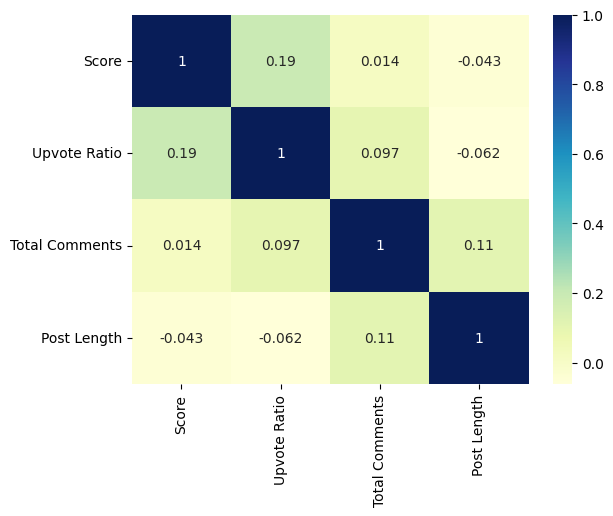

In [ ]:
dataplot = sb.heatmap(ddp_corr.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

In [ ]:
ddp_cov1 = dp_corr.drop(columns=['Post Text'])
ddp_covar1 = ddp_corr.cov()

<Axes: >

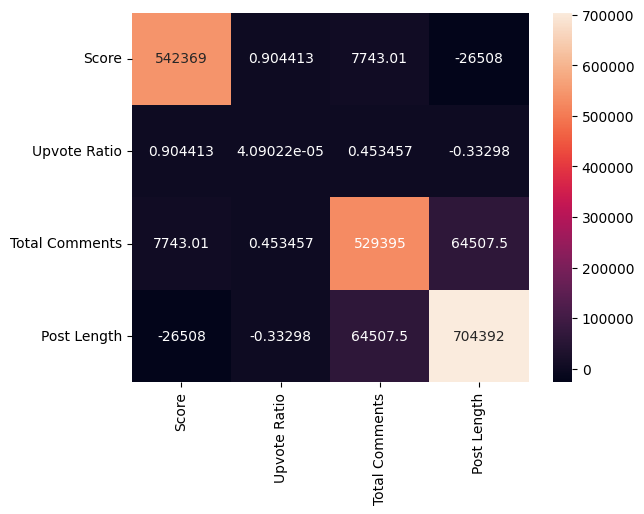

In [ ]:
sn.heatmap(ddp_covar1, annot=True, fmt='g')

In [ ]:
 dp_mean =  dp_posts['Total Comments'].mean()
 dp_mean

219.7460815047022

In [ ]:
dp_uni = dp_posts['ID'].value_counts()
dp_uni

cd0hjp    1
c1e49o    1
bjbpfi    1
drzf8r    1
ciazd5    1
         ..
dkkejd    1
dvqbw0    1
8shf3a    1
bdl2gg    1
92t7kh    1
Name: ID, Length: 319, dtype: int64

In [ ]:
 dp_up =  dp_posts['Upvote Ratio'].mean()
 dp_up

In [ ]:
pip install wordcloud

In [ ]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [ ]:
dp_posts["Post Text"].replace('[removed]', "", inplace = True)
dp_posts["Post Text"].replace('[deleted]', "", inplace = True)

In [ ]:
#dp_posts['text'] = dp_posts['Title'] + " " + dp_posts["Post Text"]

In [ ]:
df_lda = dp_posts[["Post Text"]]

In [ ]:
df_lda['Post Text'] = df_lda['Post Text'].values

<ipython-input-78-a5285635efec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lda['Post Text'] = df_lda['Post Text'].values


In [ ]:
df_lda = df_lda.dropna()
df_lda = df_lda.reset_index(drop=True)

In [ ]:
documents = df_lda
documents

,Post Text
0,"This is me. Don’t get me wrong, it’s better th..."
1,"But here I am, 24 years old man and doing exac..."
2,I read a lot of posts on here of people strugg...
3,"Thank you, that really helps. Now I feel ten t..."
4,I don’t know if that makes sense. What I mean ...
...,...
314,They originally belonged to my grandpa; I'm no...
315,Information in class is difficult to obtain. A...
316,"When I was attending high school, i was top of..."
317,"In my hardest moments of depression, the thoug..."


<Axes: >

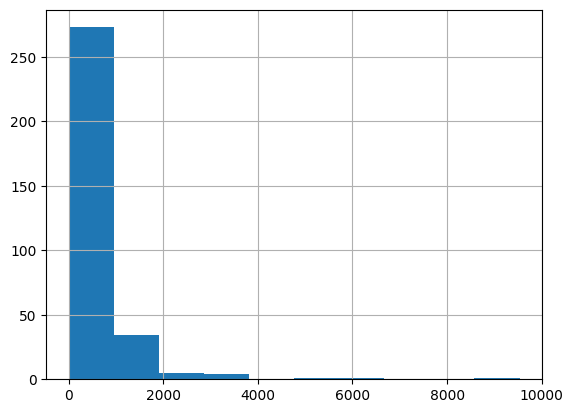

In [ ]:
documents['Post Text'].str.len().hist()

In [ ]:
text = documents['text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

KeyError: ignored

# post

In [19]:
subreddit = reddit_read_only.subreddit("depression")

In [20]:
posts = subreddit.top(time_filter = "all", limit = None)

posts_dict = {"Title": [], "Post Text": [],
              "ID": [], "Score": [], "Upvote Ratio": [],
              "Total Comments": [],"Created On":[], "Post URL": [],
              "Original Content": [], "Saved": []
              }

start_date = '11-02-20 00:00:00'

start_date = datetime.datetime.strptime(start_date, '%d-%m-%y %H:%M:%S').timestamp()


In [21]:
for post in posts:
    # Date of each posts' creation
    date = post.created_utc
    if date > start_date:
        # Title of each post
        posts_dict["Title"].append(post.title)

        # Text inside a post
        posts_dict["Post Text"].append(post.selftext)

        # Unique ID of each post
        posts_dict["ID"].append(post.id)

        # The score of a post
        posts_dict["Score"].append(post.score)

        # Upvote Ratio of a post
        posts_dict["Upvote Ratio"].append(post.upvote_ratio)

        # Total number of comments inside the post
        posts_dict["Total Comments"].append(post.num_comments)

        # Date the post was Created
        posts_dict["Created On"].append(post.created_utc)

        # URL of each post
        posts_dict["Post URL"].append(post.url)

        # Flair of each post
        posts_dict["Original Content"].append(post.is_original_content)

        # Saved check for each post
        posts_dict["Saved"].append(post.saved)

        # author's comment
        #posts_dict["Author Karma"].append(post.author.comment_karma)

In [22]:
dp_posts2 = pd.DataFrame(posts_dict)
dp_posts2['Created On'] = pd.to_datetime(dp_posts2['Created On'],  unit='s')
dp_posts2

,Title,Post Text,ID,Score,Upvote Ratio,Total Comments,Created On,Post URL,Original Content,Saved
0,I hate that people don’t understand that i don...,,i3ajk8,4724,1.00,260,2020-08-04 01:57:38,https://www.reddit.com/r/depression/comments/i...,False,False
1,"It’s like I died at 15, but my body just kept ...",I’m trapped inside. Does anyone else get that ...,g9ndgw,4169,1.00,308,2020-04-28 13:40:28,https://www.reddit.com/r/depression/comments/g...,False,False
2,It sucks when you wake up and the only thing y...,The first 6 words of the title is accurate too.,n959fs,3816,1.00,172,2021-05-10 14:07:07,https://www.reddit.com/r/depression/comments/n...,False,False
3,When you become closed off due to depression a...,Fuck 😃,j07hbh,3793,1.00,183,2020-09-26 14:58:05,https://www.reddit.com/r/depression/comments/j...,False,False
4,The scary part about having depression is when...,Basically what the title says and my current s...,f791jw,3764,1.00,117,2020-02-21 10:06:06,https://www.reddit.com/r/depression/comments/f...,False,False
...,...,...,...,...,...,...,...,...,...,...
540,I am having a mental breakdown and just called...,"Ugh, yeah like the title says. This includes m...",12728wf,827,0.99,64,2023-03-30 23:01:08,https://www.reddit.com/r/depression/comments/1...,False,False
541,I opened up to a friend and she called me a loser,She was a close friend of mine. She has recent...,14cpg66,821,0.98,198,2023-06-18 17:04:05,https://www.reddit.com/r/depression/comments/1...,False,False
542,I envy people with decent mental health and life,Like imagine waking up in the morning feeling ...,15a13e1,812,1.00,104,2023-07-26 09:44:43,https://www.reddit.com/r/depression/comments/1...,False,False
543,I'll be 26 in 3 days and all I can think about...,And I know that sounds ridiculous but I’m hone...,15infjm,808,0.98,213,2023-08-05 05:54:20,https://www.reddit.com/r/depression/comments/1...,False,False


In [ ]:
dp_posts2.head()

,Title,Post Text,ID,Score,Upvote Ratio,Total Comments,Created On,Post URL,Original Content,Saved
0,I hate that people don’t understand that i don...,,i3ajk8,4723,1.0,260,2020-08-04 01:57:38,https://www.reddit.com/r/depression/comments/i...,False,False
1,"It’s like I died at 15, but my body just kept ...",I’m trapped inside. Does anyone else get that ...,g9ndgw,4174,1.0,308,2020-04-28 13:40:28,https://www.reddit.com/r/depression/comments/g...,False,False
2,It sucks when you wake up and the only thing y...,The first 6 words of the title is accurate too.,n959fs,3808,1.0,172,2021-05-10 14:07:07,https://www.reddit.com/r/depression/comments/n...,False,False
3,When you become closed off due to depression a...,Fuck 😃,j07hbh,3791,1.0,183,2020-09-26 14:58:05,https://www.reddit.com/r/depression/comments/j...,False,False
4,The scary part about having depression is when...,Basically what the title says and my current s...,f791jw,3762,1.0,117,2020-02-21 10:06:06,https://www.reddit.com/r/depression/comments/f...,False,False


In [ ]:
#corr
dp_posts2["Post Text"].replace('[removed]', "", inplace = True)
dp_posts2["Post Text"].replace('[deleted]', "", inplace = True)
dp_posts2['Post Text'] = dp_posts2['Post Text'].values

In [ ]:
dp_corr2 = dp_posts2.drop(columns=['Post URL', 'Original Content', 'Saved', 'Created On', 'Title', 'ID'])

In [ ]:
dp_corr2['Post Length']= dp_corr2['Post Text'].str.len()

In [ ]:
dp_corr2

,Post Text,Score,Upvote Ratio,Total Comments,Post Length
0,,4723,1.00,260,0
1,I’m trapped inside. Does anyone else get that ...,4174,1.00,308,133
2,The first 6 words of the title is accurate too.,3808,1.00,172,47
3,Fuck 😃,3791,1.00,183,6
4,Basically what the title says and my current s...,3762,1.00,117,55
...,...,...,...,...,...
538,How the fuck do people keep going to work ever...,843,1.00,139,894
539,"Ugh, yeah like the title says. This includes m...",828,0.99,64,641
540,She was a close friend of mine. She has recent...,817,0.98,198,660
541,And I know that sounds ridiculous but I’m hone...,802,0.98,213,676


In [ ]:
ddp_corr2 = dp_corr2.drop(columns=['Post Text'])

In [ ]:
ddp_corr2.corr()

,Score,Upvote Ratio,Total Comments,Post Length
Score,1.000000,0.136877,0.084181,-0.024708
Upvote Ratio,0.136877,1.000000,-0.030353,-0.104927
Total Comments,0.084181,-0.030353,1.000000,0.008119
Post Length,-0.024708,-0.104927,0.008119,1.000000


In [30]:
dataplot = sb.heatmap(ddp_corr2.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

NameError: ignored

In [ ]:
ddp_cov = dp_corr2.drop(columns=['Post Text'])
ddp_covar2 = ddp_corr2.cov()

In [ ]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

<Axes: >

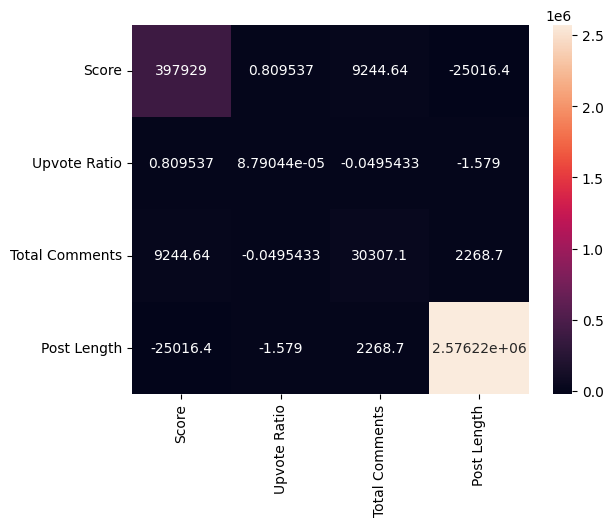

In [ ]:
sn.heatmap(ddp_covar2, annot=True, fmt='g')

In [ ]:
 dp_mean =  dp_posts2['Total Comments'].mean()
 dp_mean

In [ ]:
dp_uni = dp_posts2['ID'].value_counts()
dp_uni

In [ ]:
 dp_up =  dp_posts2['Upvote Ratio'].mean()
 dp_up

In [ ]:

dp_posts2["Post Text"].replace('[removed]', "", inplace = True)
dp_posts2["Post Text"].replace('[deleted]', "", inplace = True)

In [ ]:
#dp_posts2['text'] = dp_posts2['Title'] + " " + dp_posts2["Post Text"]

In [ ]:
df_lda = dp_posts2[["Post Text"]]

In [ ]:
df_lda['Post Text'] = df_lda['Post Text'].values

In [ ]:
df_lda = df_lda.dropna()
df_lda = df_lda.reset_index(drop=True)

In [ ]:
documents2 = df_lda
documents2

In [ ]:
documents2['Post Text'].str.len().hist()

In [ ]:
text = documents2['text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
ddp_corr2.head()

,Score,Upvote Ratio,Total Comments,Post Length
0,4732,1.0,260,0
1,4174,1.0,308,133
2,3811,1.0,172,47
3,3784,1.0,183,6
4,3758,1.0,117,55


In [ ]:
ddp_corr.head()

,Score,Upvote Ratio,Total Comments,Post Length
0,6675,1.0,348,483
1,4420,1.0,218,55
2,4095,1.0,349,1230
3,4027,1.0,245,57
4,3925,1.0,211,596


In [ ]:
ddp_f = ddp_corr.rename(columns={"Score": "Score pre", "Upvote Ratio": "Upvote Ratio pre", "Total Comments": "Total Comments pre", "Post Length": "Post Length pre"})

In [ ]:
df_merged = ddp_f.append(ddp_corr, ignore_index=True)

<ipython-input-79-9ec03f5b7459>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged = ddp_f.append(ddp_corr, ignore_index=True)


In [ ]:
df_merged

,Score pre,Upvote Ratio pre,Total Comments pre,Post Length pre,Score,Upvote Ratio,Total Comments,Post Length
0,6675.0,1.0,348.0,483.0,NaN,NaN,NaN,NaN
1,4420.0,1.0,218.0,55.0,NaN,NaN,NaN,NaN
2,4095.0,1.0,349.0,1230.0,NaN,NaN,NaN,NaN
3,4027.0,1.0,245.0,57.0,NaN,NaN,NaN,NaN
4,3925.0,1.0,211.0,596.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
633,NaN,NaN,NaN,NaN,1006.0,0.99,67.0,2584.0
634,NaN,NaN,NaN,NaN,1004.0,1.00,84.0,751.0
635,NaN,NaN,NaN,NaN,1002.0,0.99,153.0,1755.0
636,NaN,NaN,NaN,NaN,999.0,1.00,65.0,596.0


<Axes: >

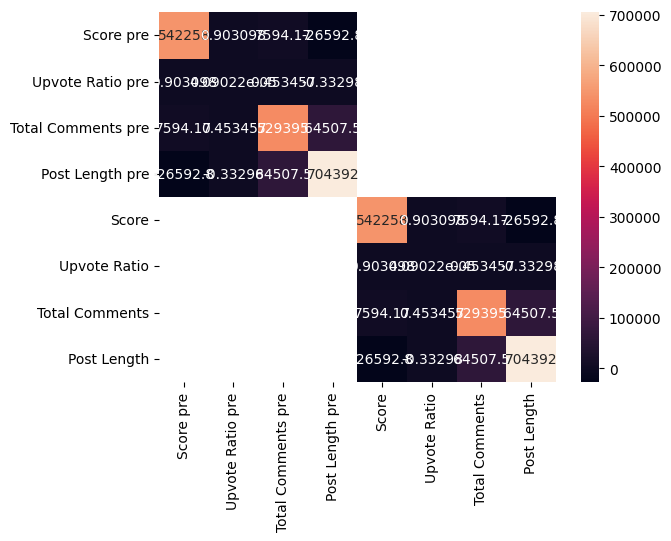

In [ ]:
df_merged_cov = df_merged.cov()
sn.heatmap(df_merged_cov, annot=True, fmt='g')

In [25]:
pre = pd.read_csv("depression_pre.csv")
post = pd.read_csv("depression_post.csv")

In [23]:
pre

,Unnamed: 0,Title,Post Text,ID,Score,Upvote Ratio,Total Comments,Created On,Post URL,Original Content,Saved,year,month
0,0,"Anyone else feel like their ""fake depressed""?","it's stupid, but i always doubt the fact i hav...",7tk5tf,2196,0.99,156,2018-01-28 13:12:11,https://www.reddit.com/r/depression/comments/7...,False,False,2018,1
1,1,Why don't you talk to us?,My parents keep asking me this question.\nToda...,7rrkf1,1660,0.99,136,2018-01-20 17:05:18,https://www.reddit.com/r/depression/comments/7...,False,False,2018,1
2,2,An old man killed my only way of coping with d...,- be me\n- have chronic depression and social ...,7t7c0h,1641,0.98,107,2018-01-26 20:18:05,https://www.reddit.com/r/depression/comments/7...,False,False,2018,1
3,3,Anyone just want to take a break from life and...,"That's all I want. I wanna go to a park, lay o...",7qwvjs,1402,0.99,104,2018-01-17 00:06:20,https://www.reddit.com/r/depression/comments/7...,False,False,2018,1
4,4,I had to fill out one of those depression test...,And I scored in the 'severe' range. This lead ...,7oydlq,1299,0.99,96,2018-01-08 13:05:09,https://www.reddit.com/r/depression/comments/7...,False,False,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,12,Why does depression and anxiety make it so fuc...,Seriously- I can’t tell even if I’ve known the...,enfyh1,1410,1.00,74,2020-01-12 00:23:46,https://www.reddit.com/r/depression/comments/e...,False,False,2020,1
323,13,Does anyone ever feel physically too weak. Eve...,I’m beginning to wonder if I have a medical co...,ex7om6,1249,1.00,103,2020-02-01 15:29:40,https://www.reddit.com/r/depression/comments/e...,False,False,2020,2
324,14,It’s not fair.,"I fucking hate it so much. People around me, j...",essxe0,1224,0.99,121,2020-01-23 13:13:37,https://www.reddit.com/r/depression/comments/e...,False,False,2020,1
325,15,I’m tired of being tired all the time.,I’m lying in bed exhausted. Tried to do homewo...,eqc90a,1154,1.00,83,2020-01-18 05:11:20,https://www.reddit.com/r/depression/comments/e...,False,False,2020,1


In [26]:
pre['Post Length']= pre['Post Text'].str.len()

In [32]:
pre2 = pre.drop(columns=['Post Text', 'Unnamed: 0', 'Post URL', 'Original Content', 'Saved', 'Created On', 'Title', 'ID', 'year', 'month'])
pre2

,Score,Upvote Ratio,Total Comments,Post Length
0,2196,0.99,156,621.0
1,1660,0.99,136,537.0
2,1641,0.98,107,826.0
3,1402,0.99,104,163.0
4,1299,0.99,96,331.0
...,...,...,...,...
322,1410,1.00,74,190.0
323,1249,1.00,103,243.0
324,1224,0.99,121,1197.0
325,1154,1.00,83,800.0


In [29]:
import matplotlib.pyplot as mp
import seaborn as sb

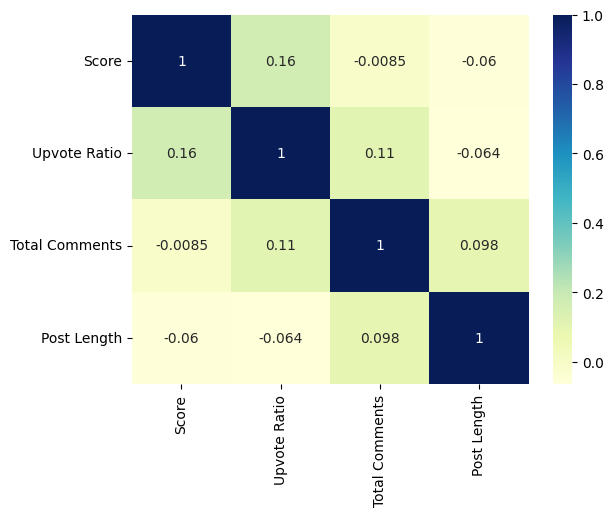

In [33]:
dataplot = sb.heatmap(pre2.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

In [35]:
post['Post Length']= post['Post Text'].str.len()

post2 = post.drop(columns=['Post Text', 'Unnamed: 0', 'Post URL', 'Original Content', 'Saved', 'Created On', 'Title', 'ID', 'year', 'month'])
post2

,Score,Upvote Ratio,Total Comments,Post Length
0,3755,1.00,117,55.0
1,3077,0.99,187,61.0
2,2820,1.00,189,294.0
3,2781,1.00,203,157.0
4,2655,0.99,282,49.0
...,...,...,...,...
468,1784,1.00,286,311.0
469,1338,1.00,58,63.0
470,1211,1.00,125,242.0
471,1159,1.00,58,207.0


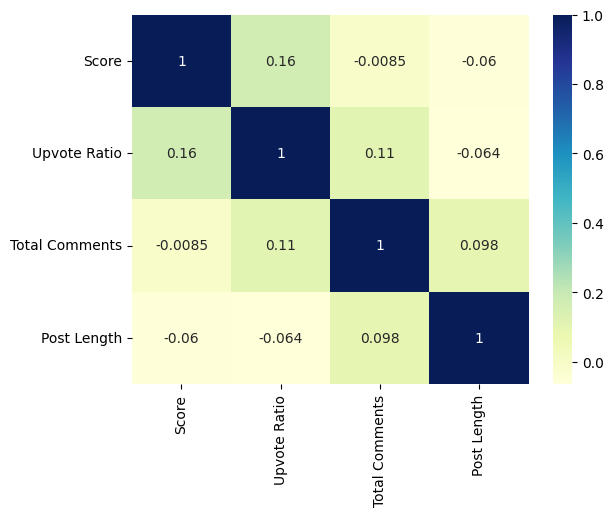

In [36]:
dataplot = sb.heatmap(pre2.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()